In [25]:
import time
import matplotlib.pyplot as plt
import random

def generate_maze(size, density):
    maze = [['.'] * size for _ in range(size)]  # Initialize maze with all open cells
    for i in range(size):
        for j in range(size):
            if random.random() < density:
                maze[i][j] = 'X'  # Add obstacles with probability density
    maze[0][0] = 'S'  # Set starting point
    maze[size - 1][size - 1] = 'G'  # Set goal point
    return maze

def visualize_maze(maze):
    for row in maze:
        print(' '.join(row))

# Assuming you already have the maze size and obstacle density defined
maze_size = 10
obstacle_density = 0.3

# Generate maze
maze = generate_maze(maze_size, obstacle_density)

# Print the generated maze for inspection
print("Generated Maze:")
visualize_maze(maze)

Generated Maze:
S . . . X . . X . .
. . . . . . . X X .
X . . . . . . X . X
. . . X X X . . X .
. . . X . . X . . .
. . . X X X . . . .
. . . . . . X . . X
X . . X . . . . X .
. . . X X X X . X X
. X X . X X . . . G


In [8]:
# Example usage:
start = (0, 0)
goal = (maze_size - 1, maze_size - 1)
visited = set()
path = []
dfs(maze, start, goal, visited, path)

# Visualize the explored path
for i in range(maze_size):
    for j in range(maze_size):
        if (i, j) in path:
            print('P', end=' ')
        else:
            print(maze[i][j], end=' ')
    print()

P P . X . . . . . . 
P P X . . X . X . . 
P P X X P P P P P X 
X P P P P X . . P P 
. . . X . X . X X P 
X . . . . . X . P P 
. X X . . . . X P P 
. X . X P P P P P P 
P P P P P X . . . . 
P P P P P P P P P P 


Run 1:


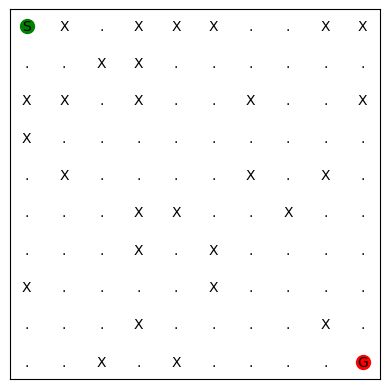

Solution Path Length: Not found
Number of Nodes Expanded: Not found
Execution Time: 2.288818359375e-05

Run 2:


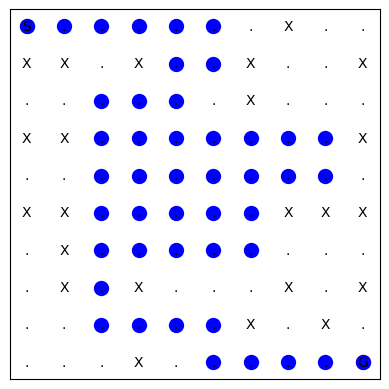

Solution Path Length: 45
Number of Nodes Expanded: 45
Execution Time: 0.00021409988403320312

Run 3:


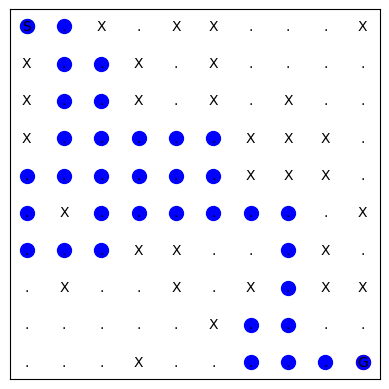

Solution Path Length: 35
Number of Nodes Expanded: 35
Execution Time: 0.00014162063598632812

Run 4:


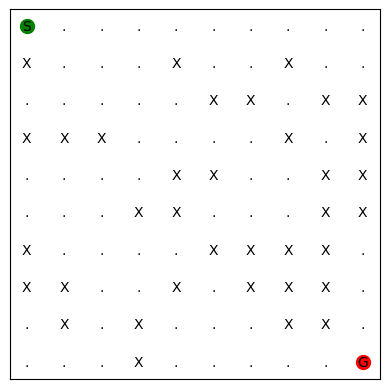

Solution Path Length: Not found
Number of Nodes Expanded: Not found
Execution Time: 0.00015234947204589844

Run 5:


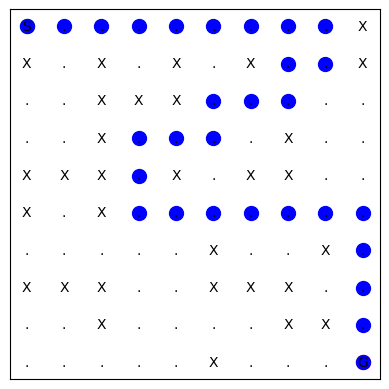

Solution Path Length: 29
Number of Nodes Expanded: 29
Execution Time: 0.00014472007751464844

Run 6:


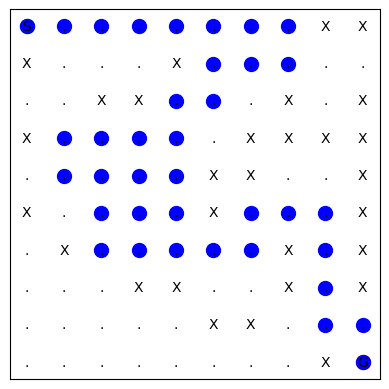

Solution Path Length: 37
Number of Nodes Expanded: 37
Execution Time: 0.00016999244689941406

Run 7:


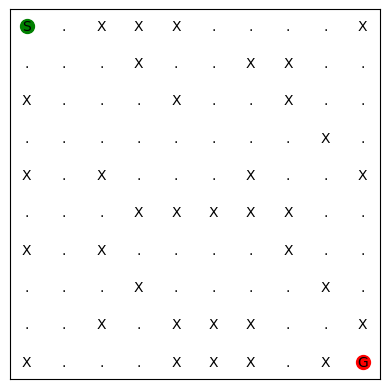

Solution Path Length: Not found
Number of Nodes Expanded: Not found
Execution Time: 0.0001499652862548828

Run 8:


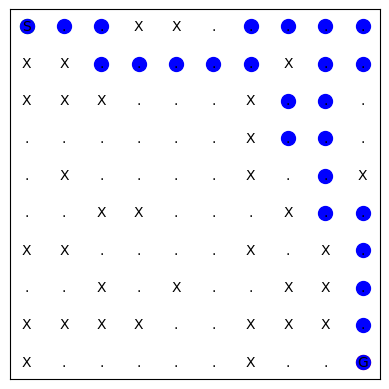

Solution Path Length: 25
Number of Nodes Expanded: 25
Execution Time: 8.082389831542969e-05

Run 9:


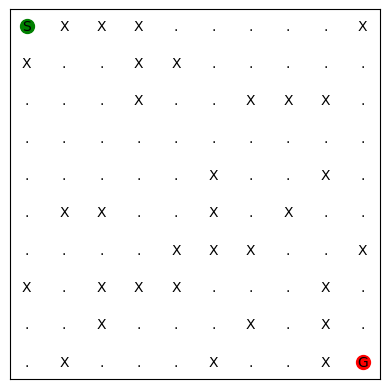

Solution Path Length: Not found
Number of Nodes Expanded: Not found
Execution Time: 1.3589859008789062e-05

Run 10:


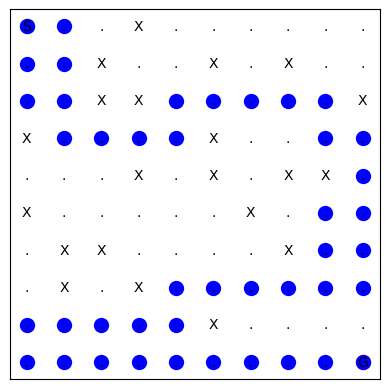

Solution Path Length: 43
Number of Nodes Expanded: 43
Execution Time: 0.0002148151397705078

DFS Performance Table (10 Runs):
Run  Solution Path Length Nodes Expanded Execution Time     Status 
1    -                    -              0.0000             Fail   
2    45                   45             0.0002             Pass   
3    35                   35             0.0001             Pass   
4    -                    -              0.0002             Fail   
5    29                   29             0.0001             Pass   
6    37                   37             0.0002             Pass   
7    -                    -              0.0001             Fail   
8    25                   25             0.0001             Pass   
9    -                    -              0.0000             Fail   
10   43                   43             0.0002             Pass   

Average DFS:
35.666666666666664   35.666666666666664 0.0002            


In [7]:
# Function to visualize maze with path
def visualize_maze_with_path(maze, path):
    # Convert maze symbols to colors for visualization
    colors = {'S': 'green', 'G': 'red', '.': 'white', 'X': 'white'}
    # Plot maze
    for i in range(len(maze)):
        for j in range(len(maze[0])):
            plt.scatter(j, -i, color=colors[maze[i][j]], s=100)
            plt.text(j, -i, maze[i][j], ha='center', va='center', fontsize=10)
    # Plot path
    if path:
        for cell in path:
            plt.scatter(cell[1], -cell[0], color='blue', s=100)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xticks([])
    plt.yticks([])
    plt.show()

def dfs(maze, start, goal, visited, path):
    # Define directions: up, down, left, right
    directions = [(0, -1), (0, 1), (-1, 0), (1, 0)]

    # Mark the current cell as visited
    visited.add(start)
    path.append(start)

    # Base case: If the current cell is the goal, return True
    if start == goal:
        return True

    # Recursive DFS exploration
    for dx, dy in directions:
        x, y = start[0] + dx, start[1] + dy
        if 0 <= x < len(maze) and 0 <= y < len(maze[0]) and maze[x][y] != 'X' and (x, y) not in visited:
            if dfs(maze, (x, y), goal, visited, path):
                return True

    # If no path found from this cell, backtrack
    path.pop()
    return False

# Initialize lists to store performance metrics for each run
dfs_results = []

def count_expanded_nodes(maze, path):
    # Count the number of nodes expanded during the DFS exploration
    expanded_nodes = set()
    for cell in path:
        expanded_nodes.add(cell)
    return len(expanded_nodes)

# Run DFS algorithm 10 times and visualize the maze exploration process for each run
for i in range(1, 11):
    # Generate a new maze for each run (assuming generate_maze is defined elsewhere)
    maze = generate_maze(maze_size, obstacle_density)
    # Start timer
    start_time = time.time()
    # Run DFS algorithm on the new maze
    path = []
    dfs(maze, start, goal, set(), path)
    # Stop timer
    end_time = time.time()
    execution_time = end_time - start_time
    # Record performance metrics for the current run
    success = len(path) != 0 and path[-1] == goal  # Check if a path was found and if it reaches the goal
    dfs_results.append({
        'Success': success,
        'Solution Path Length': len(path) if success else '-',
        'Nodes Expanded': count_expanded_nodes(maze, path) if success else '-',
        'Execution Time': execution_time
    })
    # Print visualization and performance metrics for the current run
    print(f"Run {i}:")
    visualize_maze_with_path(maze, path)
    print(f"Solution Path Length: {len(path) if success else 'Not found'}")
    print(f"Number of Nodes Expanded: {count_expanded_nodes(maze, path) if success else 'Not found'}")
    print(f"Execution Time: {execution_time}\n")

# Display performance table for DFS
print("DFS Performance Table (10 Runs):")
print("{:<4} {:<20} {:<14} {:<18} {:<7}".format("Run", "Solution Path Length", "Nodes Expanded", "Execution Time", "Status"))
for i, result in enumerate(dfs_results, start=1):
    status = "Pass" if result['Success'] else "Fail"
    print("{:<4} {:<20} {:<14} {:<18.4f} {:<7}".format(i, result.get('Solution Path Length', '-'),
                                                         result.get('Nodes Expanded', '-'),
                                                         result.get('Execution Time', 0), status))

num_successes = len([result for result in dfs_results if result['Success']])
if num_successes > 0:
    avg_solution_length = sum(result['Solution Path Length'] for result in dfs_results if result['Success']) / num_successes
    avg_nodes_expanded = sum(result['Nodes Expanded'] for result in dfs_results if result['Success']) / num_successes
    avg_execution_time = sum(result['Execution Time'] for result in dfs_results if result['Success']) / num_successes
else:
    avg_solution_length = avg_nodes_expanded = avg_execution_time = 0

print("\nAverage DFS:")
print("{:<20} {:<14} {:<18.4f}".format(avg_solution_length, avg_nodes_expanded, avg_execution_time))


Run 1:


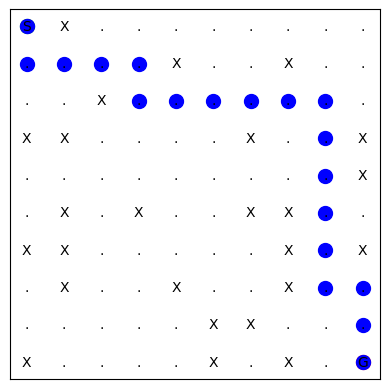

Solution Path Length: 19
Number of Nodes Expanded: 74
Execution Time: 0.00025844573974609375

Run 2:


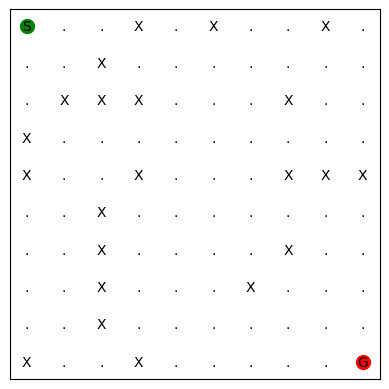

Solution Path Length: Not found
Number of Nodes Expanded: Not found
Execution Time: 3.9577484130859375e-05

Run 3:


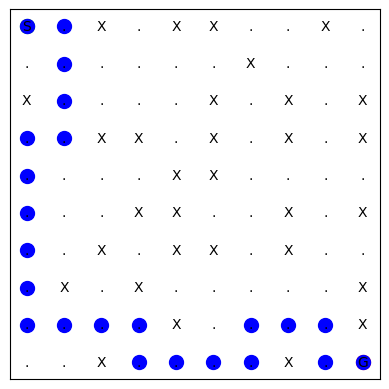

Solution Path Length: 23
Number of Nodes Expanded: 55
Execution Time: 0.00024199485778808594

Run 4:


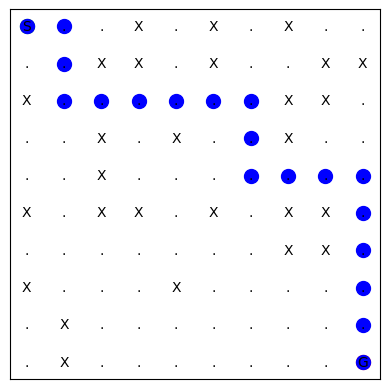

Solution Path Length: 19
Number of Nodes Expanded: 69
Execution Time: 0.00022101402282714844

Run 5:


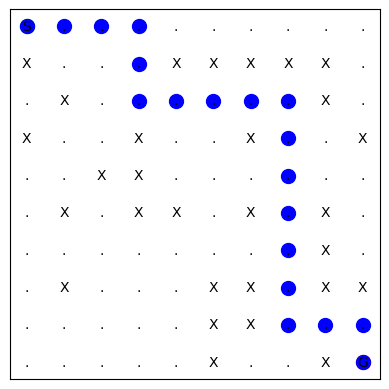

Solution Path Length: 19
Number of Nodes Expanded: 70
Execution Time: 0.00034356117248535156

Run 6:


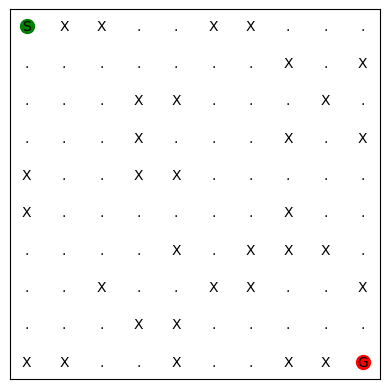

Solution Path Length: Not found
Number of Nodes Expanded: Not found
Execution Time: 0.00027108192443847656

Run 7:


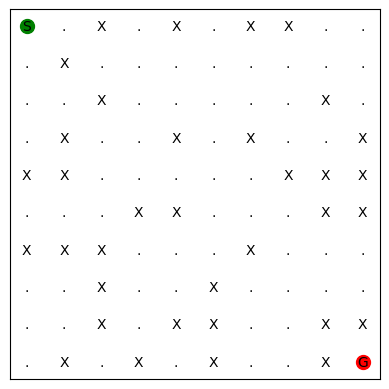

Solution Path Length: Not found
Number of Nodes Expanded: Not found
Execution Time: 4.1961669921875e-05

Run 8:


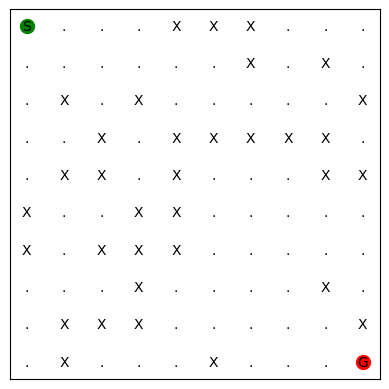

Solution Path Length: Not found
Number of Nodes Expanded: Not found
Execution Time: 0.00013017654418945312

Run 9:


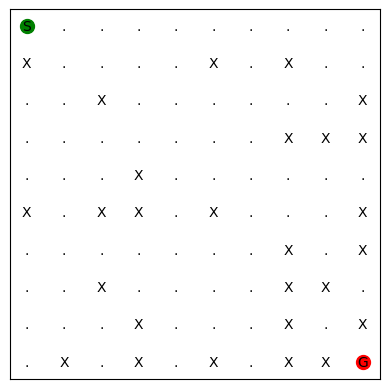

Solution Path Length: Not found
Number of Nodes Expanded: Not found
Execution Time: 0.0003440380096435547

Run 10:


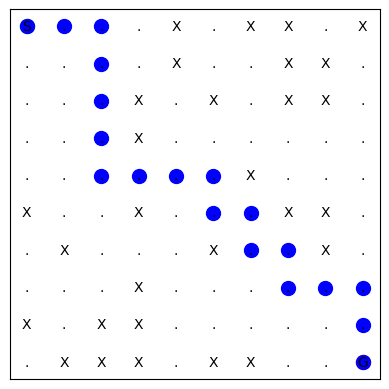

Solution Path Length: 19
Number of Nodes Expanded: 69
Execution Time: 0.00021123886108398438

BFS Performance Table (10 Runs):
Run  Solution Path Length Nodes Expanded Execution Time     Status 
1    19                   74             0.0003             Pass   
2    -                    -              0.0000             Fail   
3    23                   55             0.0002             Pass   
4    19                   69             0.0002             Pass   
5    19                   70             0.0003             Pass   
6    -                    -              0.0003             Fail   
7    -                    -              0.0000             Fail   
8    -                    -              0.0001             Fail   
9    -                    -              0.0003             Fail   
10   19                   69             0.0002             Pass   

Average BFS:
19.8                 67.4           0.0003            


In [26]:
from collections import deque
import matplotlib.pyplot as plt
import time

def bfs(maze, start, goal):
    queue = deque([start])
    visited = set([start])
    path = {}  # To keep track of the path
    directions = [(0, -1), (0, 1), (-1, 0), (1, 0)]

    while queue:
        current = queue.popleft()
        if current == goal:
            break  # Exit when the goal is reached

        for dx, dy in directions:
            next_cell = (current[0] + dx, current[1] + dy)
            if 0 <= next_cell[0] < len(maze) and 0 <= next_cell[1] < len(maze[0]) \
               and maze[next_cell[0]][next_cell[1]] != 'X' and next_cell not in visited:
                queue.append(next_cell)
                visited.add(next_cell)
                path[next_cell] = current  # Trace the path

    # Reconstruct the path from goal to start
    current = goal
    reconstructed_path = []
    while current != start:
        reconstructed_path.append(current)
        current = path.get(current)
        if current is None:  # Path not found
            return [], visited
    reconstructed_path.append(start)
    reconstructed_path.reverse()

    return reconstructed_path, visited

# The visualize_maze_with_path function can remain the same, as it is agnostic to the search algorithm used.
def visualize_maze_with_path(maze, path):
    # Convert maze symbols to colors for visualization
    colors = {'S': 'green', 'G': 'red', '.': 'white', 'X': 'white'}
    # Plot maze
    for i in range(len(maze)):
        for j in range(len(maze[0])):
            plt.scatter(j, -i, color=colors[maze[i][j]], s=100)
            plt.text(j, -i, maze[i][j], ha='center', va='center', fontsize=10)
    # Plot path
    if path:
        for cell in path:
            plt.scatter(cell[1], -cell[0], color='blue', s=100)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xticks([])
    plt.yticks([])
    plt.show()

# The count_expanded_nodes function also remains largely unchanged, except for its use in the context of BFS.
def count_expanded_nodes(maze, path):
    # Count the number of nodes expanded during the DFS exploration
    expanded_nodes = set()
    for cell in path:
        expanded_nodes.add(cell)
    return len(expanded_nodes)

# Initialize lists to store performance metrics for each run
bfs_results = []

# Assuming generate_maze, maze_size, and obstacle_density are defined elsewhere
for i in range(1, 11):
    maze = generate_maze(maze_size, obstacle_density)
    start_time = time.time()
    path, visited = bfs(maze, start, goal)
    end_time = time.time()
    execution_time = end_time - start_time

    success = len(path) > 0 and path[-1] == goal
    bfs_results.append({
        'Success': success,
        'Solution Path Length': len(path) if success else '-',
        'Nodes Expanded': len(visited) if success else '-',
        'Execution Time': execution_time
    })

    print(f"Run {i}:")
    visualize_maze_with_path(maze, path)
    print(f"Solution Path Length: {len(path) if success else 'Not found'}")
    print(f"Number of Nodes Expanded: {len(visited) if success else 'Not found'}")
    print(f"Execution Time: {execution_time}\n")

# Summary and performance table for BFS will be similar to the previous DFS implementation, but using bfs_results.
print("BFS Performance Table (10 Runs):")
print("{:<4} {:<20} {:<14} {:<18} {:<7}".format("Run", "Solution Path Length", "Nodes Expanded", "Execution Time", "Status"))
for i, result in enumerate(bfs_results, start=1):
    status = "Pass" if result['Success'] else "Fail"
    print("{:<4} {:<20} {:<14} {:<18.4f} {:<7}".format(i, result.get('Solution Path Length', '-'),
                                                         result.get('Nodes Expanded', '-'),
                                                         result.get('Execution Time', 0), status))

num_successes = len([result for result in bfs_results if result['Success']])
if num_successes > 0:
    avg_solution_length = sum(result['Solution Path Length'] for result in bfs_results if result['Success']) / num_successes
    avg_nodes_expanded = sum(result['Nodes Expanded'] for result in bfs_results if result['Success']) / num_successes
    avg_execution_time = sum(result['Execution Time'] for result in bfs_results if result['Success']) / num_successes
else:
    avg_solution_length = avg_nodes_expanded = avg_execution_time = 0

print("\nAverage BFS:")
print("{:<20} {:<14} {:<18.4f}".format(avg_solution_length, avg_nodes_expanded, avg_execution_time))

P P P P . . . X . . 
. X . P X . . X . . 
. . . P X X . . X . 
. . . P X . . . X X 
X . . P P P . . . . 
X X . . . P . . X . 
X . X . . P . . X X 
X . . X . P X X . . 
. . X . . P P P P P 
. X . . X X X X . P 


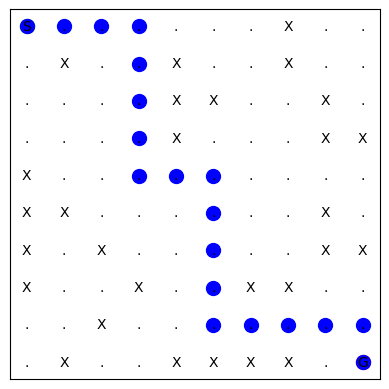

Run 1:


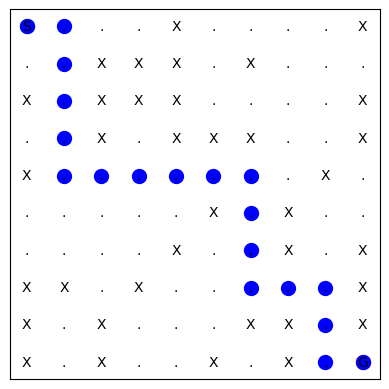

Solution Path Length: 19
Number of Nodes Expanded: 19
Execution Time: 0.0004401206970214844

Run 2:


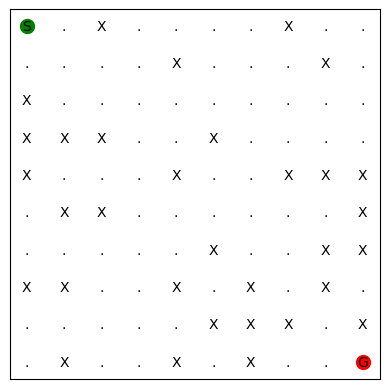

Solution Path Length: Not found
Number of Nodes Expanded: Not found
Execution Time: 0.0006244182586669922

Run 3:


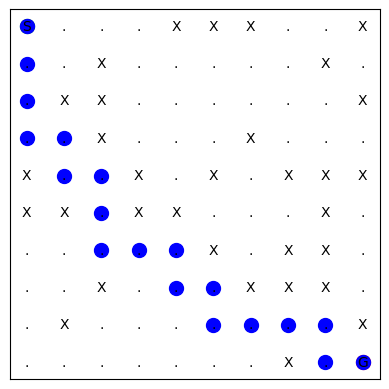

Solution Path Length: 19
Number of Nodes Expanded: 19
Execution Time: 0.0002970695495605469

Run 4:


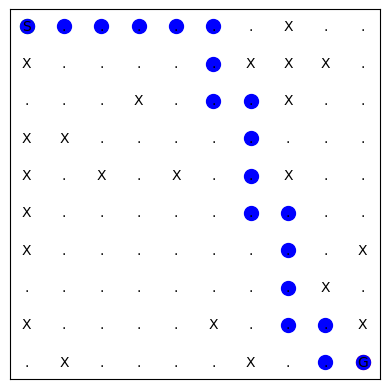

Solution Path Length: 19
Number of Nodes Expanded: 19
Execution Time: 0.0003936290740966797

Run 5:


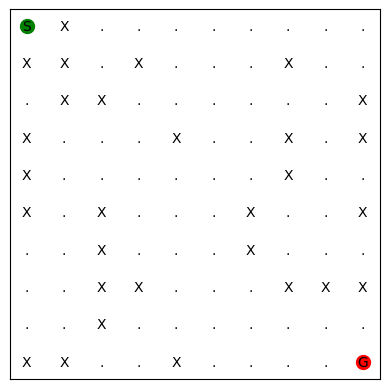

Solution Path Length: Not found
Number of Nodes Expanded: Not found
Execution Time: 1.430511474609375e-05

Run 6:


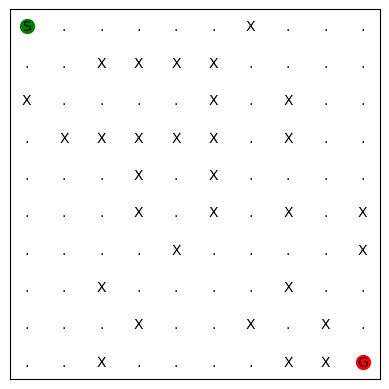

Solution Path Length: Not found
Number of Nodes Expanded: Not found
Execution Time: 8.249282836914062e-05

Run 7:


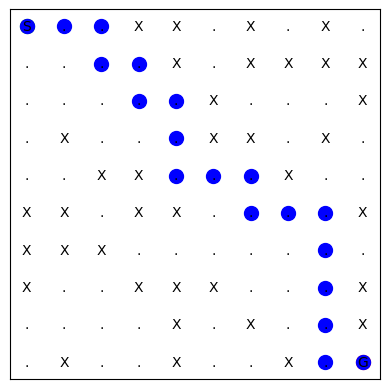

Solution Path Length: 19
Number of Nodes Expanded: 19
Execution Time: 0.0002570152282714844

Run 8:


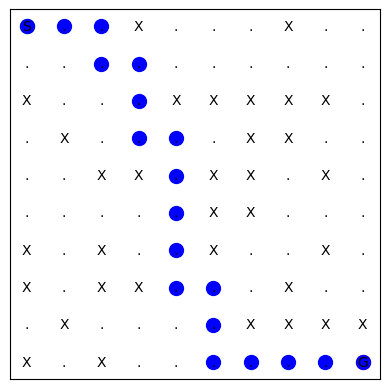

Solution Path Length: 19
Number of Nodes Expanded: 19
Execution Time: 0.0002655982971191406

Run 9:


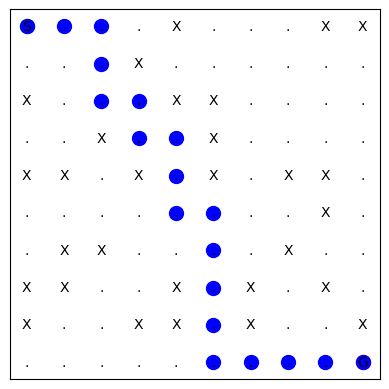

Solution Path Length: 19
Number of Nodes Expanded: 19
Execution Time: 0.00028443336486816406

Run 10:


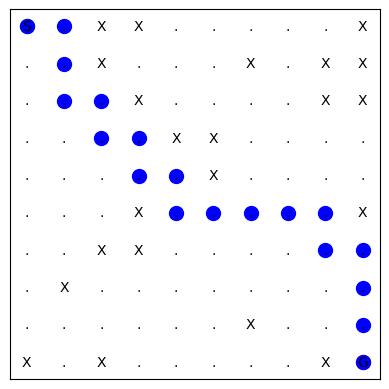

Solution Path Length: 19
Number of Nodes Expanded: 19
Execution Time: 0.0005807876586914062

A* Performance Table (10 Runs):
Run  Solution Path Length Nodes Expanded Execution Time     Status 
1    19                   19             0.0004             Pass   
2    -                    -              0.0006             Fail   
3    19                   19             0.0003             Pass   
4    19                   19             0.0004             Pass   
5    -                    -              0.0000             Fail   
6    -                    -              0.0001             Fail   
7    19                   19             0.0003             Pass   
8    19                   19             0.0003             Pass   
9    19                   19             0.0003             Pass   
10   19                   19             0.0006             Pass   

Average A*:
19.0                 19.0           0.0004            


In [28]:
import heapq

def heuristic(node, goal):
    # Manhattan distance heuristic
    return abs(node[0] - goal[0]) + abs(node[1] - goal[1])

def astar(maze, start, goal):
    queue = [(heuristic(start, goal), 0, start, [])]
    visited = set()

    while queue:
        _, cost, current, path = heapq.heappop(queue)

        if current == goal:
            return path + [current]

        if current not in visited:
            visited.add(current)
            for neighbor in [(current[0] + 1, current[1]), (current[0] - 1, current[1]),
                              (current[0], current[1] + 1), (current[0], current[1] - 1)]:
                if 0 <= neighbor[0] < len(maze) and 0 <= neighbor[1] < len(maze[0]) and maze[neighbor[0]][neighbor[1]] != 'X':
                    new_cost = cost + 1
                    heapq.heappush(queue, (new_cost + heuristic(neighbor, goal), new_cost, neighbor, path + [current]))

    return []  # If no path is found

# Example usage:
start = (0, 0)
goal = (maze_size - 1, maze_size - 1)
astar_path = astar(maze, start, goal)

# Visualize the explored path
for i in range(maze_size):
    for j in range(maze_size):
        if (i, j) in astar_path:
            print('P', end=' ')
        else:
            print(maze[i][j], end=' ')
    print()

# Visualize the maze with the A* path
visualize_maze_with_path(maze, astar_path)

# Run A* algorithm 10 times and visualize the maze exploration process for each run
astar_results = []
for i in range(1, 11):
    # Generate a new maze for each run
    maze = generate_maze(maze_size, obstacle_density)
    # Start timer
    start_time = time.time()
    # Run A* algorithm on the new maze
    path = astar(maze, start, goal)
    # Stop timer
    end_time = time.time()
    execution_time = end_time - start_time
    # Record performance metrics for the current run
    success = len(path) != 0 and path[-1] == goal
    astar_results.append({
        'Success': success,
        'Solution Path Length': len(path) if success else '-',
        'Nodes Expanded': count_expanded_nodes(maze, path) if success else '-',
        'Execution Time': execution_time
    })
    # Print visualization and performance metrics for the current run
    print(f"Run {i}:")
    visualize_maze_with_path(maze, path)
    print(f"Solution Path Length: {len(path) if success else 'Not found'}")
    print(f"Number of Nodes Expanded: {count_expanded_nodes(maze, path) if success else 'Not found'}")
    print(f"Execution Time: {execution_time}\n")

# Display performance table for A*
print("A* Performance Table (10 Runs):")
print("{:<4} {:<20} {:<14} {:<18} {:<7}".format("Run", "Solution Path Length", "Nodes Expanded", "Execution Time", "Status"))
for i, result in enumerate(astar_results, start=1):
    status = "Pass" if result['Success'] else "Fail"
    print("{:<4} {:<20} {:<14} {:<18.4f} {:<7}".format(i, result.get('Solution Path Length', '-'),
                                                         result.get('Nodes Expanded', '-'),
                                                         result.get('Execution Time', 0), status))

num_successes = len([result for result in astar_results if result['Success']])
if num_successes > 0:
    avg_solution_length = sum(result['Solution Path Length'] for result in astar_results if result['Success']) / num_successes
    avg_nodes_expanded = sum(result['Nodes Expanded'] for result in astar_results if result['Success']) / num_successes
    avg_execution_time = sum(result['Execution Time'] for result in astar_results if result['Success']) / num_successes
else:
    avg_solution_length = avg_nodes_expanded = avg_execution_time = 0

print("\nAverage A*:")
print("{:<20} {:<14} {:<18.4f}".format(avg_solution_length, avg_nodes_expanded, avg_execution_time))

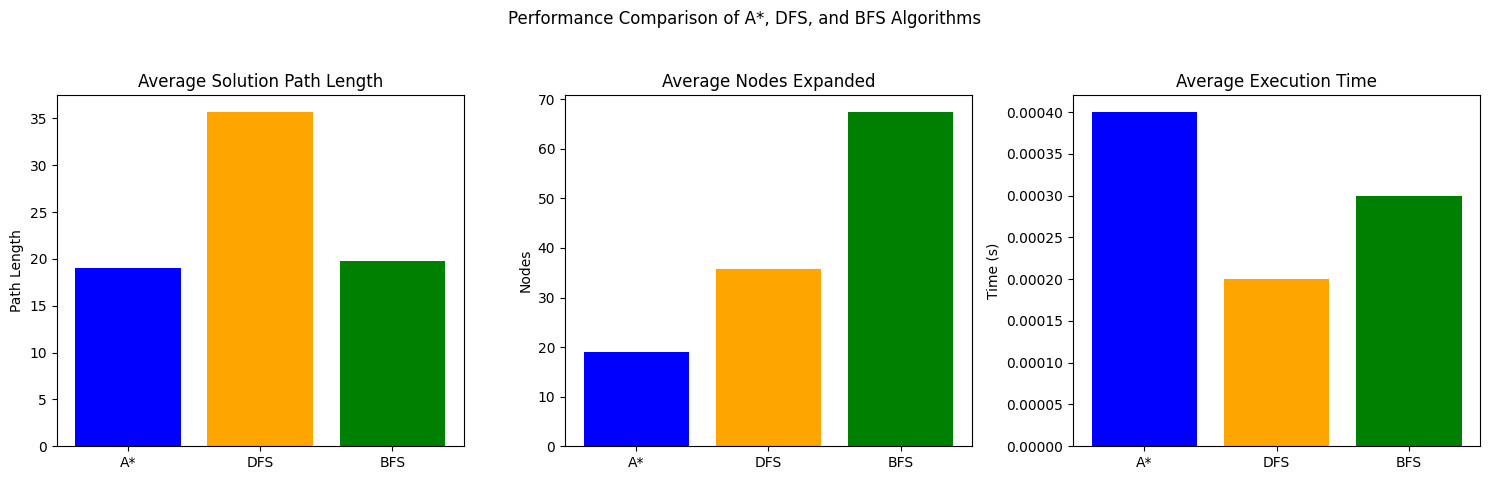

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Data preparation
data = {
    'Algorithm': ['A*', 'DFS', 'BFS'],
    'Average Solution Path Length': [19.0, 35.666666666666664, 19.8],
    'Average Nodes Expanded': [19.0, 35.666666666666664, 67.4],
    'Average Execution Time (s)': [0.0004, 0.0002, 0.0003]
}

df = pd.DataFrame(data)

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # Adjusted for 3 plots in a row
fig.suptitle('Performance Comparison of A*, DFS, and BFS Algorithms')

# Solution Path Length
axs[0].bar(df['Algorithm'], df['Average Solution Path Length'], color=['blue', 'orange', 'green'])
axs[0].set_title('Average Solution Path Length')
axs[0].set_ylabel('Path Length')

# Nodes Expanded
axs[1].bar(df['Algorithm'], df['Average Nodes Expanded'], color=['blue', 'orange', 'green'])
axs[1].set_title('Average Nodes Expanded')
axs[1].set_ylabel('Nodes')

# Execution Time
axs[2].bar(df['Algorithm'], df['Average Execution Time (s)'], color=['blue', 'orange', 'green'])
axs[2].set_title('Average Execution Time')
axs[2].set_ylabel('Time (s)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
